In [83]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from glob import glob
import pickle

In [14]:
female = glob('./data/crop/female/*.jpg')
male = glob('./data/crop/male/*.jpg')

In [15]:
len(female),len(male)

(3590, 2469)

In [16]:
path = female+male

In [19]:
#get size of image
def getSize(path):
    img = Image.open(path)
    return(img.size[0])

In [20]:
getSize(path[0])

273

In [22]:
df = pd.DataFrame(data=path,columns=['path'])
df

,path
0,./data/crop/female\female_0.jpg
1,./data/crop/female\female_1.jpg
2,./data/crop/female\female_100.jpg
3,./data/crop/female\female_1003.jpg
4,./data/crop/female\female_1008.jpg
...,...
6054,./data/crop/male\male_989.jpg
6055,./data/crop/male\male_99.jpg
6056,./data/crop/male\male_991.jpg
6057,./data/crop/male\male_995.jpg


In [23]:
df['size'] = df['path'].apply(getSize)
df

,path,size
0,./data/crop/female\female_0.jpg,273
1,./data/crop/female\female_1.jpg,182
2,./data/crop/female\female_100.jpg,182
3,./data/crop/female\female_1003.jpg,182
4,./data/crop/female\female_1008.jpg,81
...,...,...
6054,./data/crop/male\male_989.jpg,182
6055,./data/crop/male\male_99.jpg,273
6056,./data/crop/male\male_991.jpg,122
6057,./data/crop/male\male_995.jpg,182


In [25]:
df.describe()

,size
count,6059.000000
mean,154.017000
std,71.148624
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

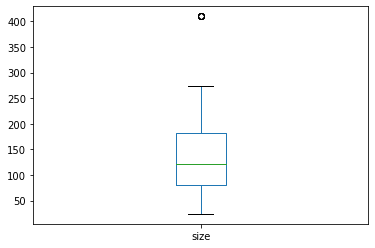

In [28]:
df['size'].plot(kind='box')

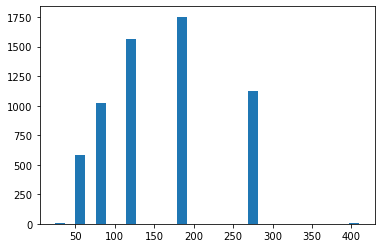

In [33]:
plt.hist(df['size'],bins=30)
plt.show()

## resize all the images in 100 x 100 and remove images with size less than 60

In [34]:
df_new = df[df['size']>60]

In [35]:
df_new

,path,size
0,./data/crop/female\female_0.jpg,273
1,./data/crop/female\female_1.jpg,182
2,./data/crop/female\female_100.jpg,182
3,./data/crop/female\female_1003.jpg,182
4,./data/crop/female\female_1008.jpg,81
...,...,...
6054,./data/crop/male\male_989.jpg,182
6055,./data/crop/male\male_99.jpg,273
6056,./data/crop/male\male_991.jpg,122
6057,./data/crop/male\male_995.jpg,182


In [54]:
def gender(string):
    #string = df['path'][0]
    try:
        return string.split('\\')[0].split('/')[-1]
    except:
        return None


In [62]:
df_new['gender'] = df_new['path'].apply(gender)

C:\Users\princ\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_new

,path,size,gender
0,./data/crop/female\female_0.jpg,273,female
1,./data/crop/female\female_1.jpg,182,female
2,./data/crop/female\female_100.jpg,182,female
3,./data/crop/female\female_1003.jpg,182,female
4,./data/crop/female\female_1008.jpg,81,female
...,...,...,...
6054,./data/crop/male\male_989.jpg,182,male
6055,./data/crop/male\male_99.jpg,273,male
6056,./data/crop/male\male_991.jpg,122,male
6057,./data/crop/male\male_995.jpg,182,male


In [64]:
df_new['gender'].value_counts()

female    3255
male      2210
Name: gender, dtype: int64

# Resize image

In [66]:
def resize_img(path_to_resize):
    img = cv2.imread(path_to_resize)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    size = gray.shape[0]
    if(size>100):
        gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA)
    else:
        gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
    return gray_re.flatten()    

In [67]:
len(resize_img(path[0]))

10000

In [68]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

C:\Users\princ\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df_new


,path,size,gender,structure_data
0,./data/crop/female\female_0.jpg,273,female,"[188, 182, 182, 185, 174, 181, 192, 180, 217, ..."
1,./data/crop/female\female_1.jpg,182,female,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,./data/crop/female\female_100.jpg,182,female,"[22, 31, 40, 34, 31, 62, 11, 17, 10, 18, 13, 1..."
3,./data/crop/female\female_1003.jpg,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,./data/crop/female\female_1008.jpg,81,female,"[88, 86, 70, 53, 47, 46, 32, 20, 18, 23, 28, 2..."
...,...,...,...,...
6054,./data/crop/male\male_989.jpg,182,male,"[31, 31, 31, 31, 31, 31, 31, 31, 30, 29, 29, 3..."
6055,./data/crop/male\male_99.jpg,273,male,"[89, 42, 32, 18, 16, 14, 13, 27, 24, 76, 114, ..."
6056,./data/crop/male\male_991.jpg,122,male,"[25, 25, 26, 25, 26, 31, 35, 46, 58, 115, 195,..."
6057,./data/crop/male\male_995.jpg,182,male,"[21, 28, 31, 24, 19, 24, 21, 19, 31, 36, 14, 2..."


In [71]:
df1  = df_new['structure_data'].apply(pd.Series)

In [72]:
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,22,31,40,34,31,62,11,17,10,18,...,156,172,176,186,175,184,186,191,176,177
3,35,35,35,35,35,35,35,35,35,35,...,74,84,90,93,86,71,89,85,84,74
4,88,86,70,53,47,46,32,20,18,23,...,35,34,32,31,31,33,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,31,31,31,31,31,31,31,31,30,29,...,72,74,38,22,38,33,29,50,86,29
6055,89,42,32,18,16,14,13,27,24,76,...,47,50,120,13,114,85,17,132,21,105
6056,25,25,26,25,26,31,35,46,58,115,...,45,46,45,41,37,34,31,29,31,33
6057,21,28,31,24,19,24,21,19,31,36,...,22,14,11,16,16,19,24,20,23,24


In [73]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [74]:
df2

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,182,182,185,174,181,192,180,217,...,109,111,115,116,122,116,120,119,117,110
1,female,32,23,31,27,28,30,28,33,36,...,58,47,27,34,22,27,23,37,63,18
2,female,22,31,40,34,31,62,11,17,10,...,156,172,176,186,175,184,186,191,176,177
3,female,35,35,35,35,35,35,35,35,35,...,74,84,90,93,86,71,89,85,84,74
4,female,88,86,70,53,47,46,32,20,18,...,35,34,32,31,31,33,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,male,31,31,31,31,31,31,31,31,30,...,72,74,38,22,38,33,29,50,86,29
6055,male,89,42,32,18,16,14,13,27,24,...,47,50,120,13,114,85,17,132,21,105
6056,male,25,25,26,25,26,31,35,46,58,...,45,46,45,41,37,34,31,29,31,33
6057,male,21,28,31,24,19,24,21,19,31,...,22,14,11,16,16,19,24,20,23,24


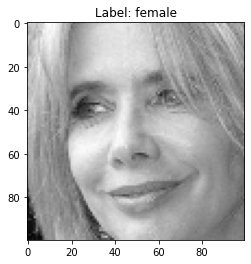

In [82]:
plt.imshow(df2.iloc[0,1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title('Label: '+df2.loc[0]['gender'])
plt.show()

In [84]:
pickle.dump(df2,open('./data/dataframe_100_100_pickle','wb'))